# First Machine Learning Project

## 1. Load libraries

In [39]:
# load libraries
import pandas as pd
from pandas.plotting import scatter_matrix as sm # scatter matrix (biểu đồ phân tán nhiều chiều)
import matplotlib.pyplot as plt # thư viện vẽ biểu đồ

from sklearn.model_selection import train_test_split as tts # Chia dataset thành tập train và test
from sklearn.model_selection import KFold as KF             # Dùng để chia dữ liệu thành nhiều “fold” (k phần) cho Cross-Validation
from sklearn.model_selection import cross_val_score as cvs  # Chạy Cross-Validation và tính điểm (accuracy, F1, …) cho từng fold --> Đánh giá tính ổn định của mô hình

from sklearn.metrics import classification_report as cr     # Xuất báo cáo về precision, recall, f1-score, support cho từng lớp
from sklearn.metrics import confusion_matrix as cm          # Xuất ma trận nhầm lẫn (so sánh dự đoán với thực tế)
from sklearn.metrics import accuracy_score as acc           # Tính độ chính xác (Accuracy) của mô hình

from sklearn.linear_model import LogisticRegression as LR   # Thuật toán hồi quy logistic, dùng cho phân loại nhị phân (binary classification)
from sklearn.tree import DecisionTreeClassifier as DT       # Thuật toán cây quyết định cho phân loại
from sklearn.neighbors import KNeighborsClassifier as KNN   # Thuật toán K-Nearest Neighbors.➝ Dự đoán dựa trên số láng giềng gần nhất trong không gian dữ liệu
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # Phân tích biệt thức tuyến tính.➝ Dùng để giảm chiều dữ liệu và phân loại
from sklearn.naive_bayes import GaussianNB as GNB           # Thuật toán Naive Bayes phân phối chuẩn (Gaussian).➝ Giả định các đặc trưng độc lập và tuân theo phân phối chuẩn
from sklearn.svm import SVC as SVM                          # Thuật toán Support Vector Machine cho phân loại.➝ Mạnh mẽ với dữ liệu có nhiều đặc trưng, có thể dùng kernel để xử lý dữ liệu phi tuyến


In [40]:
# load dataset
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('./data/iris.csv', names=names)

## 2. Summarize the Dataset (Tóm tắt dữ liệu)
### **Dimensions of Dataset (Kích thước tập dữ liệu)**

In [41]:
#shape of dataset
print(df.shape) # Hiển thị kích thước của dataset (số dòng, số cột)

(150, 5)


### **Peek at the Data (Xem dữ liệu)**

In [42]:
df.head(20) # Hiển thị 20 dòng đầu tiên của dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### **Class Distribution (Phân bố từng lớp)**

In [43]:
# Class distribution
print(df.groupby("class").size()) # Hiển thị số lượng mẫu trong từng lớp (class)

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## 3. Data Visualization (Trực quan hóa dữ liệu)
### **Univariate Plots (Biểu đồ đơn biến)**

sepal_length       Axes(0.125,0.53;0.352273x0.35)
sepal_width     Axes(0.547727,0.53;0.352273x0.35)
petal_length       Axes(0.125,0.11;0.352273x0.35)
petal_width     Axes(0.547727,0.11;0.352273x0.35)
dtype: object

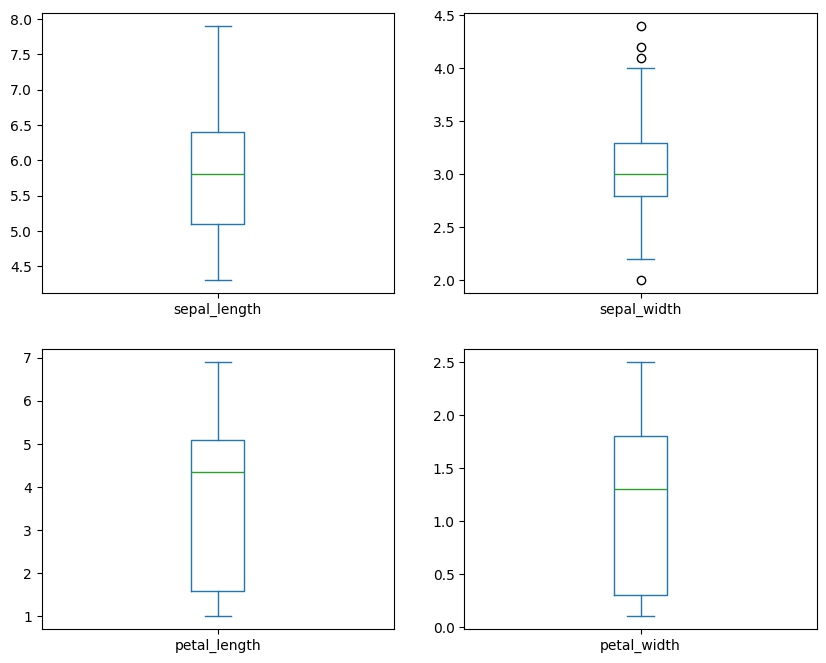

In [44]:
# box and whisker plot
df.plot.box(subplots=True, layout=(2,2), figsize=(10,8), sharex=False, sharey=False)

We can also create a histogram of each input variable to get an idea of the distribution. 

It looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.

---

Chúng ta cũng có thể tạo một biểu đồ histogram cho mỗi biến đầu vào để có được ý tưởng về phân phối.

Có vẻ như có thể hai trong số các biến đầu vào có phân phối Gaussian. Điều này rất hữu ích để lưu ý vì chúng ta có thể sử dụng các thuật toán có thể khai thác giả định này.

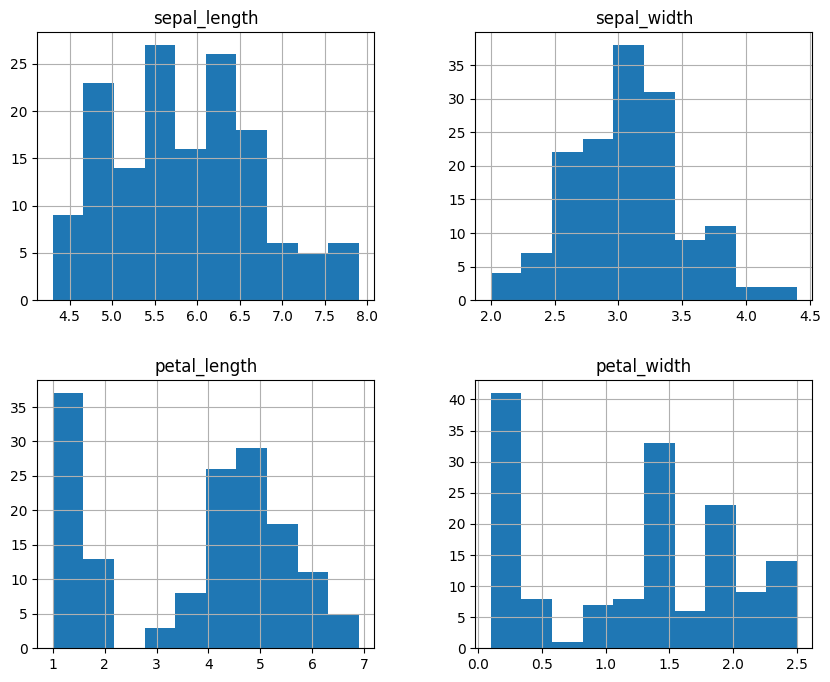

In [45]:
# histogram
df.hist(figsize=(10,8))
plt.show()

### **Multivariate Plots (Biểu đồ đa biến)**

Now we can look at the interactions between the variables. Let’s look at scatter plots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

---

Bây giờ chúng ta có thể xem xét sự tương tác giữa các biến. Hãy quan sát các biểu đồ scatter của tất cả các cặp thuộc tính. Điều này có thể hữu ích để phát hiện các mối quan hệ có cấu trúc giữa các biến đầu vào.

Lưu ý rằng có sự nhóm lại theo đường chéo ở một số cặp thuộc tính. Điều này gợi ý rằng chúng có mối tương quan cao và một mối quan hệ có thể dự đoán được.

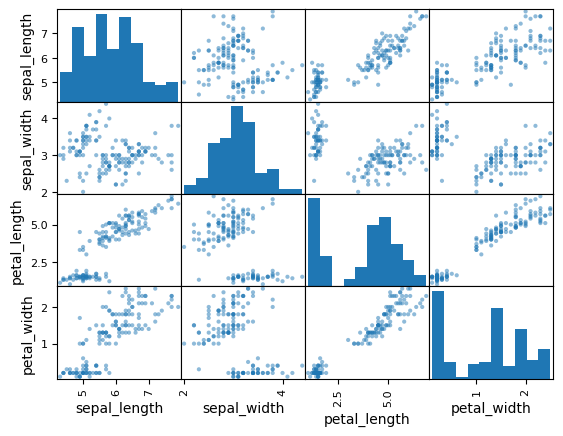

In [46]:
# Scatter Plot matrix (Ma trận phân tán)
sm(df)
plt.show()

### **Interpretation of the Scatter Matrix**

Based on the chart above, we can understand that:

- **Main diagonal**: Histograms of each variable --> show the data distribution.  
- **Off-diagonal cells**: Scatter plots between two variables --> show whether they have a linear relationship.  

#### **Observations from the scatter plots:**
- If the points form a clear diagonal line (more concentrated, less scattered) → **high correlation**.  
  - *Example*: `petal_length` and `petal_width` in the figure --> almost a straight diagonal line --> **strong correlation**.  
- Conversely, if the points are more scattered --> **weak correlation**.  
  - *Example*: `sepal_length` and `sepal_width` are more scattered --> **weak correlation**.  

---

### **Giải thích Ma trận Phân tán**

**Dựa vào biểu đồ trên, ta có thể hiểu được:**

- **Đường chéo chính**: là histogram của từng biến --> cho biết phân phối dữ liệu.  
- **Các ô ngoài đường chéo**: là scatter plot giữa 2 biến --> cho thấy chúng có quan hệ tuyến tính hay không.  

#### **Nhận xét từ scatter plot:**
- Nếu các điểm tạo thành một **đường thẳng chéo rõ rệt** (càng tập trung, ít phân tán) --> **tương quan cao**.  
  - *Ví dụ*: `petal_length` và `petal_width` trong hình --> gần như thành đường chéo --> **tương quan mạnh**.  
- Ngược lại, nếu các điểm **phân tán nhiều hơn** → **tương quan yếu**.  
  - *Ví dụ*: `sepal_length` và `sepal_width` --> **tương quan yếu**.  


## 4. Evaluate Some Algorithms (Đánh giá một số thuật toán)
Now it is time to create some models of the data and estimate their accuracy on unseen data.
Here is what we are going to cover in this step:
1. Separate out a validation dataset.
2. Setup the test harness to use 10-fold cross validation.
3. Build 5 different models to predict species from flower measurements
4. Select the best model.

---

Bây giờ là lúc để tạo ra một số mô hình dữ liệu và ước lượng độ chính xác của chúng trên dữ liệu chưa thấy.
Dưới đây là những gì chúng ta sẽ đề cập trong bước này:
1. Tách ra một tập dữ liệu xác thực.
2. Thiết lập khung thử nghiệm để sử dụng phương pháp kiểm tra chéo 10 lần.
3. Xây dựng 5 mô hình khác nhau để dự đoán loài từ các phép đo hoa.
4. Chọn mô hình tốt nhất.

### **Create a Validation Dataset (Tạo tập dữ liệu xác thực)**
how accurate the best model might actually be. We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

You now have training data in the `X train` and `Y train` for preparing models and a `X validation` and `Y validation` sets that we can use later.

---

Độ chính xác của mô hình tốt nhất có thể đạt được là bao nhiêu. Chúng ta sẽ chia tập dữ liệu đã tải lên thành hai phần, 80% trong số đó sẽ được sử dụng để huấn luyện các mô hình của chúng ta và 20% sẽ được giữ lại làm tập dữ liệu xác thực. 

Bây giờ bạn có dữ liệu huấn luyện trong `X train` và `Y train` để chuẩn bị cho các mô hình, cùng với các tập `X validation` và `Y validation` mà chúng ta có thể sử dụng sau này.

In [47]:
# Split-out validation dataset
array = df.values  # Chuyển DataFrame thành mảng NumPy
X = array[:,0:4]   # Các thuộc tính đầu vào (Lấy tất cả các hàng (:) và các cột từ 0 đến 3)
Y = array[:,4]     # Thuộc tính đầu ra (lấy toàn bộ hàng ở cột 4)
validation_size = 0.20  # Kích thước tập xác thực (20% dữ liệu)
seed = 7                # Giá trị random_state để tái lập kết quả
X_train, X_validation, Y_train, Y_validation = tts(X, Y, test_size=validation_size, random_state=seed)

### **Build Models (Chọn mô hình huấn luyện)**
Let’s evaluate six different algorithms:
* Logistic Regression (LR).
* Linear Discriminant Analysis (LDA).
* k-Nearest Neighbors (KNN).
* Classification and Regression Trees (DT).
* Gaussian Naive Bayes (GNB).
* Support Vector Machines (SVM).

This list is a good mixture of simple linear (LR and LDA), nonlinear (KNN, DT, GNB and SVM) algorithms. We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable. Let’s build and evaluate our five models.

---

Hãy để đánh giá sáu thuật toán khác nhau:
* Logistic Regression (LR).
* Linear Discriminant Analysis (LDA).
* k-Nearest Neighbors (KNN).
* Classification and Regression Trees (DT).
* Gaussian Naive Bayes (GNB).
* Support Vector Machines (SVM).

Danh sách này là một hỗn hợp tốt của các thuật toán tuyến tính đơn giản (LR và LDA), phi tuyến (KNN, DT, GNB và SVM). Chúng tôi đặt lại hạt số ngẫu nhiên trước mỗi lần chạy để đảm bảo rằng việc đánh giá từng thuật toán được thực hiện bằng cách sử dụng chính xác cùng một phân tách dữ liệu. Nó đảm bảo kết quả là tương đương trực tiếp. Hãy để xây dựng và đánh giá năm mô hình của chúng tôi:


In [48]:
# Spot-Check Algorithms
models = []
models.append(('LR', LR()))
models.append(('LDA', LDA()))
models.append(('KNN', KNN()))
models.append(('DT', DT()))
models.append(('GNB', GNB()))
models.append(('SVM', SVM()))

# evaluate each model in turn (Đánh giá từng mô hình một)
results = []
names = []
for name, model in models:
    kfold = KF(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cvs(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
DT: 0.950000 (0.076376)
GNB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)


### **Select The Best Model (Chọn mô hình tốt nhất)**
After running, We now have 6 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate. 

---

Sau khi chạy, bây giờ chúng ta có 6 mô hình và ước tính chính xác cho mỗi mô hình. Chúng ta cần so sánh các mô hình với nhau và chọn chính xác nhất.

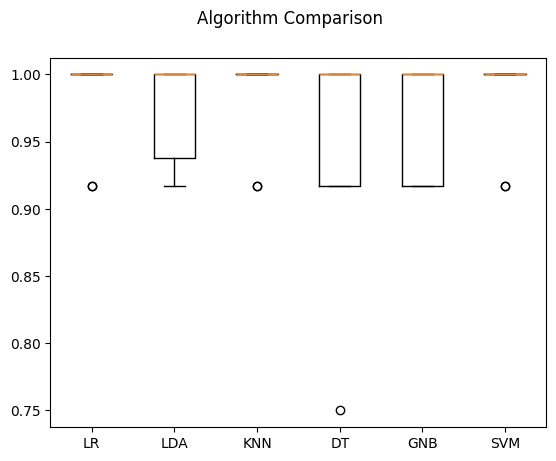

In [49]:
# Compare Algorithms (So sánh thuật toán mô hình)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

*Overall comparison:*
* LR, KNN, SVM are stable models and have the highest accuracy.(The chart has almost no dispersion --> stable results, less volatility)
* DT is unstable, can be overfitting on some folds.
* GNB and LDA are quite good, but more dispersed than LR/SVM.

---

*So sánh tổng thể:*
* LR, KNN, SVM là những mô hình ổn định và có độ chính xác cao nhất. (Biểu đồ hầu như không có sự phân tán --> kết quả ổn định, ít biến động )
* DT không ổn định, có thể overfitting trên một số fold.
* GNB và LDA khá tốt, nhưng phân tán nhiều hơn so với LR/SVM.

## 5. Make Predictions (Đưa ra dự đoán)

In [ ]:
# Make predictions on validation dataset (Đưa ra dự đoán trên tập xác thực)
print("KNN:")
knn = KNN()  # Khởi tạo mô hình K-Nearest Neighbors
knn.fit(X_train, Y_train)  # Huấn luyện mô hình với dữ liệu train
predictions = knn.predict(X_validation)  # Dự đoán trên dữ liệu validation

print(acc(Y_validation, predictions))  # In ra độ chính xác (accuracy)
print(cm(Y_validation, predictions))   # In ra ma trận nhầm lẫn (confusion matrix)
print(cr(Y_validation, predictions))   # In ra classification report (precision, recall, f1-score)

KNN:
0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



Giải thích kết quả:
* **accuracy** (`0.9`) : Mô hình KNN đạt 90% độ chính xác trên tập validation (30 mẫu)
* **confusion matrix** : Hàng = nhãn thực tế (True label), Cột = nhãn dự đoán (Predicted label)
    + `[7 0 0]` : Tất cả 7 mẫu Iris-setosa được dự đoán đúng.
    + `[0 11 1]` : Trong 12 mẫu Iris-versicolor, mô hình dự đoán đúng 11, nhầm 1 thành Virginica.
    + `[0 2 9]` : Trong 11 mẫu Iris-virginica, mô hình dự đoán đúng 9, nhầm 2 thành Versicolor.
* **classification report (precision, recall, f1-score)**:
    + *Precision* : % mẫu dự đoán đúng trong tất cả mẫu dự đoán thuộc lớp đó.
    + *Recall* : % mẫu dự đoán đúng trong tất cả mẫu thực sự thuộc lớp đó.
    + *F1-score* : trung bình điều hòa giữa precision và recall.
    + *Support* : số lượng mẫu thực tế của lớp đó.

In [ ]:
# Make predictions on validation dataset (Đưa ra dự đoán trên tập xác thực)
print("LR:")
lr = LR()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)

print(acc(Y_validation, predictions))
print(cm(Y_validation, predictions))
print(cr(Y_validation, predictions))

LR:
0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



In [ ]:
# Make predictions on validation dataset (Đưa ra dự đoán trên tập xác thực)
print("SVM:")
svm = SVM()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)

print(acc(Y_validation, predictions))
print(cm(Y_validation, predictions))
print(cr(Y_validation, predictions))

SVM:
0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



In [ ]:
# Make predictions on validation dataset (Đưa ra dự đoán trên tập xác thực)
print("GNB:")
gnb = GNB()
gnb.fit(X_train, Y_train)
predictions = gnb.predict(X_validation)

print(acc(Y_validation, predictions))
print(cm(Y_validation, predictions))
print(cr(Y_validation, predictions))

GNB:
0.8333333333333334
[[7 0 0]
 [0 9 3]
 [0 2 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

       accuracy                           0.83        30
      macro avg       0.86      0.86      0.86        30
   weighted avg       0.84      0.83      0.83        30



In [ ]:
# Make predictions on validation dataset (Đưa ra dự đoán trên tập xác thực)
print("LDA:")
lda = LDA()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)

print(acc(Y_validation, predictions))
print(cm(Y_validation, predictions))
print(cr(Y_validation, predictions))

LDA:
0.9666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
# Make predictions on validation dataset (Đưa ra dự đoán trên tập xác thực)
print("DT:")
dt = DT()
dt.fit(X_train, Y_train)
predictions = dt.predict(X_validation)

print(acc(Y_validation, predictions))
print(cm(Y_validation, predictions))
print(cr(Y_validation, predictions))

DT:
0.9
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

